In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import f1_score
import warnings
warnings.filterwarnings('ignore')

In [8]:
# Load the dataset
df = pd.read_csv('data/Pumpkin_Seeds_Dataset.csv', encoding='latin1')

In [9]:
# Data Preprocessing
X = df.drop(columns=['Class'])
y = df['Class']

In [10]:
# Test-train split
X_train, X_test, y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [11]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [19]:
# Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [20]:
# Model Evaluation
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Classification Report:\n", metrics.classification_report(y_test, y_pred))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred))   



Accuracy: 0.856
Classification Report:
                precision    recall  f1-score   support

   Çerçevelik       0.83      0.89      0.86       251
Ürgüp Sivrisi       0.88      0.82      0.85       249

     accuracy                           0.86       500
    macro avg       0.86      0.86      0.86       500
 weighted avg       0.86      0.86      0.86       500

Confusion Matrix:
 [[224  27]
 [ 45 204]]


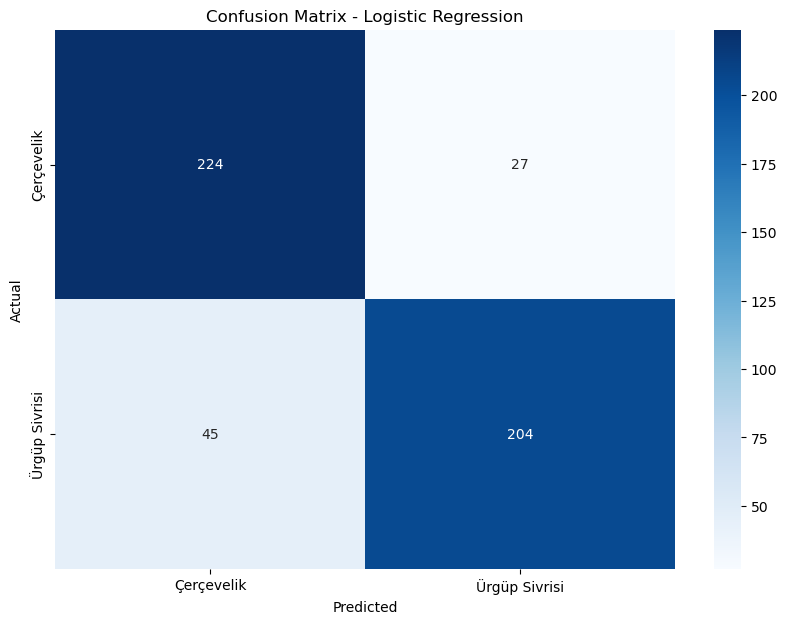

In [ ]:
# Plotting the Confusion Matrix heatmap
cm = confusion_matrix(y_test, y_pred)
labels = model.classes_

plt.figure(figsize=(10, 7))
sns.heatmap(cm,annot = True, fmt = 'd', cmap = 'Blues', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')     
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.savefig('confusion_matrix_logistic_regression.png')
plt.show()

ROC AUC Score: 0.923


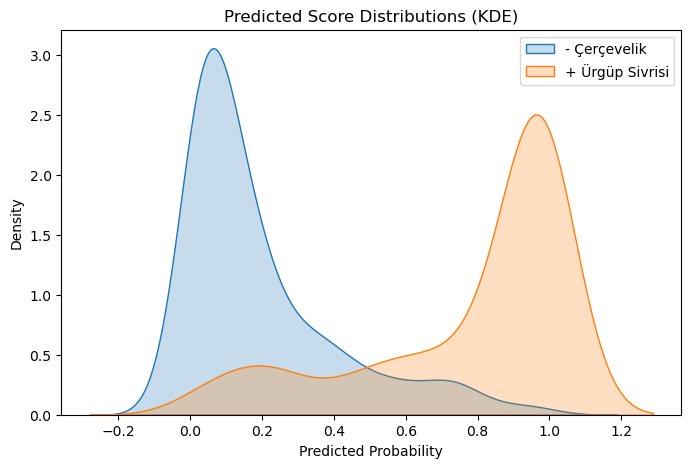

In [34]:
# ROC_AUC
# converting the labels to binary format
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test).ravel() # Flatten the array to 1D

# Get the predicted probabilities for the positive class
y_probs = model.predict_proba(X_test)[:, 1]

# Compute and print AUC
auc_score = roc_auc_score(y_test_bin, y_probs)
print(f"ROC AUC Score: {auc_score:.3f}")

# Separate out the scores
neg_scores = y_probs[y_test_bin == 0]
pos_scores = y_probs[y_test_bin == 1]

# we replace the binary classes names with the actual variety names
class_names = model.classes_
neg_class_name = class_names[0] # 'Çerçevelik'
pos_class_name = class_names[1] # 'Ürgüp Sivrisi'

# Plot their density histograms
plt.figure(figsize=(8,5))
sns.kdeplot(neg_scores, shade=True, label= (f"- {neg_class_name}"))
sns.kdeplot(pos_scores, shade=True, label= (f"+ {pos_class_name}"))
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Predicted Score Distributions (KDE)')
plt.legend()
plt.show()

In [23]:
# choosing the optimal threshold for classification
thresholds = np.linspace(0, 1, 101)
f1_scores = []
for t in thresholds:
    preds = (y_probs >= t).astype(int)
    f1_scores.append(f1_score(y_test_bin, preds))

best_idx = np.argmax(f1_scores)
best_t = thresholds[best_idx]
best_f1 = f1_scores[best_idx]
print(f"Best threshold = {best_t:.2f}, F1 = {best_f1:.2f}")


Best threshold = 0.43, F1 = 0.86


Accuracy after adjusting threshold : 0.858
Confusion Matrix after adjusting threshold:
 [[217  34]
 [ 37 212]]

Classification Report after adjusting threshold:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86       251
           1       0.86      0.85      0.86       249

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



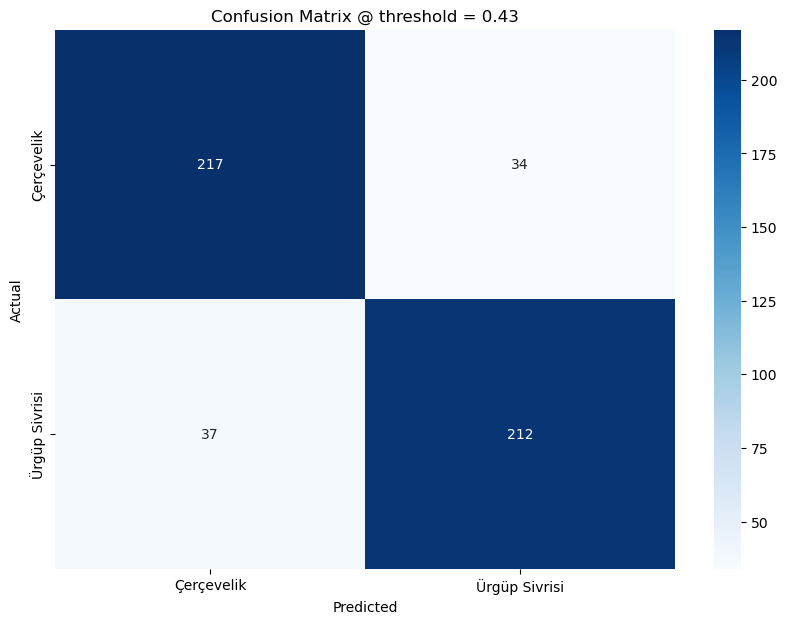

In [27]:
# applying the best threshold to get final predictions
final_preds = (y_probs >= best_t).astype(int)

print("Accuracy after adjusting threshold :", metrics.accuracy_score(y_test_bin, final_preds))
print("Confusion Matrix after adjusting threshold:\n", confusion_matrix(y_test_bin, final_preds))
print("\nClassification Report after adjusting threshold:\n", metrics.classification_report(y_test_bin, final_preds))

# Plotting new the Confusion Matrix heatmap after threshold adjustment
cm = confusion_matrix(y_test_bin, final_preds)
labels = lb.classes_.tolist()

plt.figure(figsize=(10, 7))
sns.heatmap(cm,annot = True, fmt = 'd', cmap = 'Blues', xticklabels = labels, yticklabels = labels)
plt.xlabel('Predicted')     
plt.ylabel('Actual')
plt.title('Confusion Matrix @ threshold = {:.2f}'.format(best_t))
plt.savefig('confusion_matrix@threshold.png')
plt.show()